# Generate plots from CSV files

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [7]:

window_type = "hann"
complexity = "Simple"
for window_type in ("rectangular", "hann", "blackman"):
    for complexity in ("Simple", "Complex"):
        path_to_results = "../Spectrogram Results/" + complexity + "/" + window_type + ".csv"

        df = pd.read_csv(path_to_results)

        plt.plot(df["0"], label='training loss')
        plt.plot(df["1"], label='validation loss')
        plt.ylim((0, 2))
        # plt.plot(df[""], label="who knows")
        plt.legend()
        plt.xlabel("Model iterations")
        plt.ylabel("Cross-entropy loss")
        if window_type == "blackman":
            temp = "Blackman"
        elif window_type == "hann":
            temp = "Hann"
        else:
            temp = window_type
        plt.title("Training and validation loss for " + temp + " window, " + complexity.lower() + " network")

        plt.savefig("../Figures/" + window_type + complexity + ".png")
        plt.close()



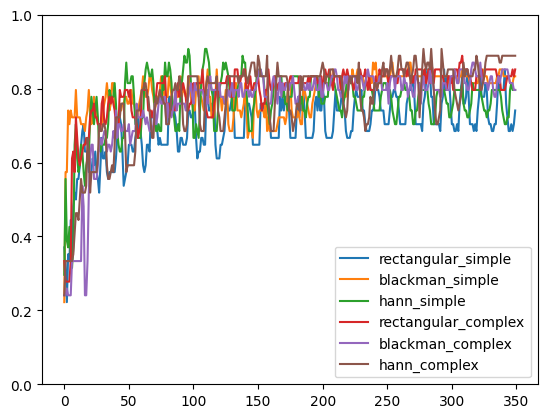

0.6762962962962962
0.7851851851851852
0.7851851851851853
0.812962962962963
0.8025925925925926
0.8033333333333335


In [13]:
pathroot = "../Spectrogram Results"

Simple = "/Simple"
Complex  = "/Complex"
Custom = "/Custom"

hann = "/hann.csv"
blackman = "/blackman.csv"
rectangular = "/rectangular.csv"
mfcc = "/mfcc.csv"

df1 = pd.read_csv(pathroot + Simple + rectangular)
df2 = pd.read_csv(pathroot + Simple + blackman)
df3 = pd.read_csv(pathroot + Simple + hann)

df4 = pd.read_csv(pathroot + Complex + rectangular)
df5 = pd.read_csv(pathroot + Complex + blackman)
df6 = pd.read_csv(pathroot + Complex + hann)


plt.plot(df1["2"], label="rectangular_simple")
plt.plot(df2["2"], label="blackman_simple")
plt.plot(df3["2"], label="hann_simple")

plt.plot(df4["2"], label="rectangular_complex")
plt.plot(df5["2"], label="blackman_complex")
plt.plot(df6["2"], label="hann_complex")

plt.ylim((0, 1))
plt.legend()
plt.show()


def last10avg(indf, start, end):

    out = np.mean(indf["2"][start:-1])
    return out

for i in (df1, df2, df3):
    print(np.mean(i["2"][50:100]))

for i in (df4, df5, df6):
    print(np.mean(i["2"][150:200]))


### Report data from k-fold results

In [20]:
pathroot = "../KFold results"

rectangular = "/rectangular.csv"
hann = "/hann.csv"
blackman = "/blackman.csv"

rectangular_df = pd.read_csv(pathroot + rectangular)
blackman_df = pd.read_csv(pathroot + blackman)
hann_df = pd.read_csv(pathroot + hann)

out_list = []


def makeKFoldPlots(func, name):
    plt.plot(func(rectangular_df.transpose(), axis=0), label="rectangular")
    plt.plot(func(blackman_df.transpose(), axis=0), label="Blackman")
    plt.plot(func(hann_df.transpose(), axis=0), label="Hann")

    plt.xlabel("Model iterations")
    plt.ylabel(name)
    plt.title("K-fold window type analysis, " + name)

    plt.legend()

    plt.savefig("../Figures/kfold" + name + ".png")
    plt.close()

makeKFoldPlots(np.mean, "Mean")
makeKFoldPlots(np.min, "Minimum")
makeKFoldPlots(np.std, "Standard Deviation")


def last10avg(df):
    window = 5
    last_rows = df.iloc[-window:, :]
    return np.mean(last_rows, axis=0).to_numpy()

out_rectangular = last10avg(rectangular_df)
out_blackman = last10avg(blackman_df)
out_hann = last10avg(hann_df)

print(out_rectangular)
print(np.mean(out_rectangular))
print(np.std(out_rectangular))
print(out_blackman)
print(np.mean(out_blackman))
print(np.std(out_blackman))
print(out_hann)
print(np.mean(out_hann))
print(np.std(out_hann))



[0.77037037 0.80754717 0.83773585 0.68301887 0.77735849]
0.7752061495457723
0.05192767496729817
[0.85185185 0.76981132 0.70188679 0.7245283  0.67169811]
0.7439552760307477
0.06273510713608625
[0.74814815 0.75849057 0.73962264 0.73207547 0.79245283]
0.7541579315164221
0.02107272250831289


## MFCCs

In [3]:
window_type = "mfcc"
for complexity in ("Simple", "Custom"):
    path_to_results = "../Spectrogram Results/" + complexity + "/" + window_type + ".csv"

    df = pd.read_csv(path_to_results)

    plt.plot(df["0"], label='training loss')
    plt.plot(df["1"], label='validation loss')
    plt.ylim((0, 2))
    # plt.plot(df[""], label="who knows")
    plt.legend()
    plt.xlabel("Model iterations")
    plt.ylabel("Cross-entropy loss")
    if window_type == "blackman":
        temp = "Blackman"
    elif window_type == "hann":
        temp = "Hann"
    elif window_type == "mfcc":
        temp = "MFCC"
    else:
        temp = window_type
    plt.title("Training and validation loss for " + temp + " window, " + complexity.lower() + " network")

    plt.savefig("../Figures/" + window_type + complexity + ".png")
    plt.close()

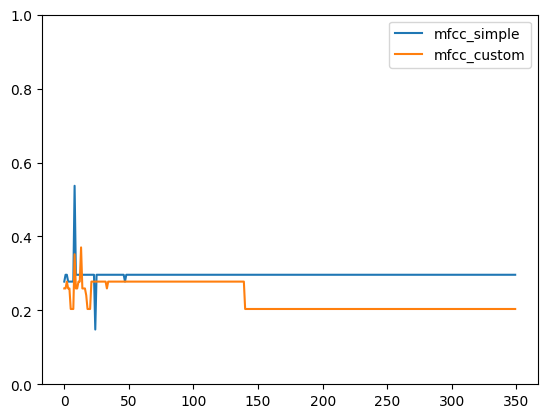

0.2962962962962963
0.2777777777777778


In [4]:
pathroot = "../Spectrogram Results"

df7 = pd.read_csv(pathroot + "/Simple/mfcc.csv")
df8 = pd.read_csv(pathroot + "/Custom/mfcc.csv")


plt.plot(df7["2"], label="mfcc_simple")
plt.plot(df8["2"], label="mfcc_custom")


plt.ylim((0, 1))
plt.legend()
plt.show()


def last10avg(indf, start, end):

    out = np.mean(indf["2"][start:-1])
    return out

for i in (df7, df8):
    print(np.mean(i["2"][50:100]))